In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Mudassir\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

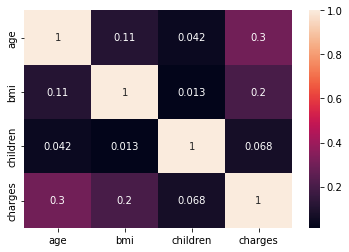

In [8]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Gender Distribution')

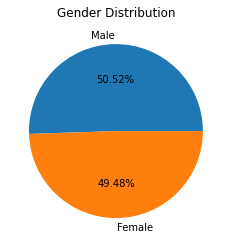

In [9]:
plt.pie(df['sex'].value_counts(),autopct='%1.2f%%',labels=['Male','Female'])
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Smokers')

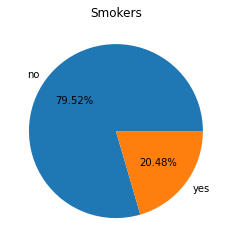

In [10]:
plt.pie(df['smoker'].value_counts(),autopct='%1.2f%%',labels=['no','yes'])
plt.title('Smokers')

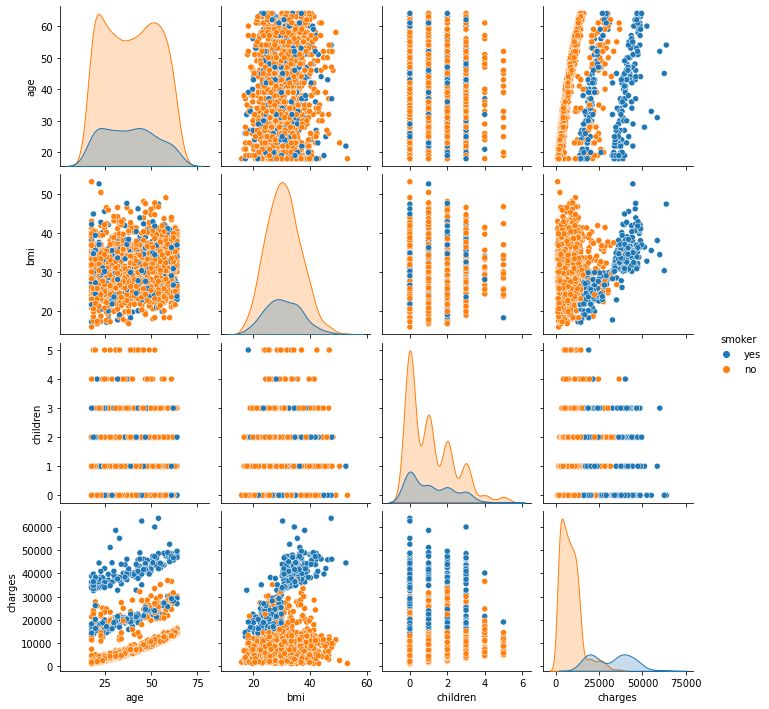

In [11]:
sns.pairplot(df,hue='smoker')

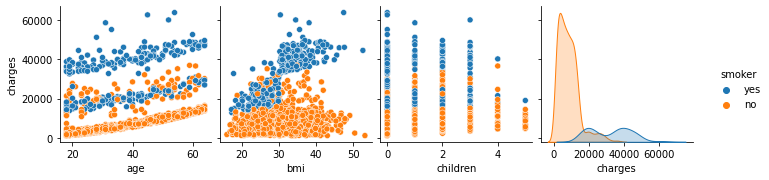

In [12]:
sns.pairplot(df,hue='smoker',kind='scatter',y_vars='charges')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

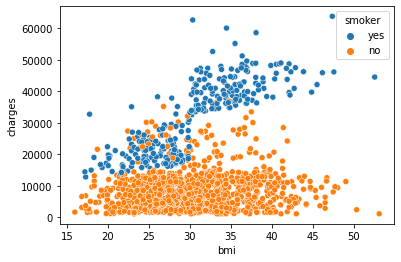

In [13]:
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')

<AxesSubplot:xlabel='age', ylabel='charges'>

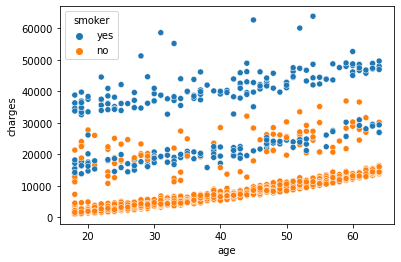

In [14]:
sns.scatterplot(x='age',y='charges',data=df,hue='smoker')

In [15]:
df['sex'] = df['sex'].map(lambda x :1 if x=='female' else 0)
df['smoker'] = df['smoker'].map(lambda x :1 if x=='yes' else 0)

In [16]:
df.rename(columns = {'sex':'if_female', 'smoker':'if_smoker'}, inplace = True)

In [17]:
df.head()

,age,if_female,bmi,children,if_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [18]:
reg_dummies = pd.get_dummies(df['region'],drop_first=True)
reg_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [19]:
df = pd.concat([df,reg_dummies], axis=1)

In [20]:
df.head()

,age,if_female,bmi,children,if_smoker,region,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,1,0,0


In [21]:
df.drop(['region'],axis=1,inplace=True)
df.drop(['children'],axis=1,inplace=True)

In [22]:
df.head()

,age,if_female,bmi,if_smoker,charges,northwest,southeast,southwest
0,19,1,27.900,1,16884.92400,0,0,1
1,18,0,33.770,0,1725.55230,0,1,0
2,28,0,33.000,0,4449.46200,0,1,0
3,33,0,22.705,0,21984.47061,1,0,0
4,32,0,28.880,0,3866.85520,1,0,0


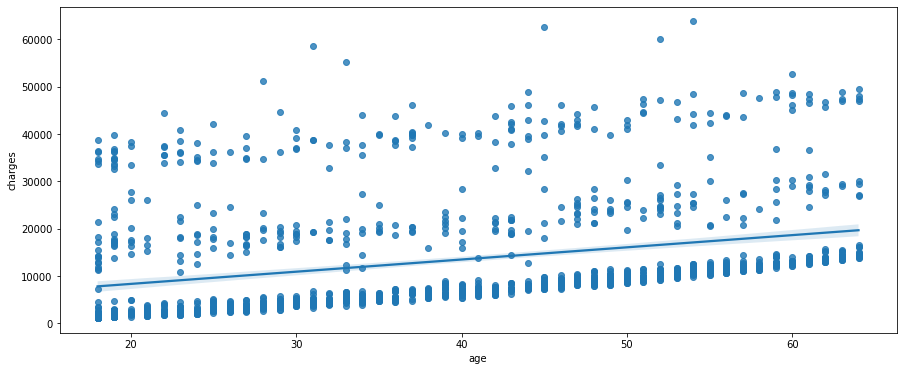

In [23]:
plt.figure(figsize=(15,6))
sns.regplot(x='age',y='charges',data=df)
plt.show()

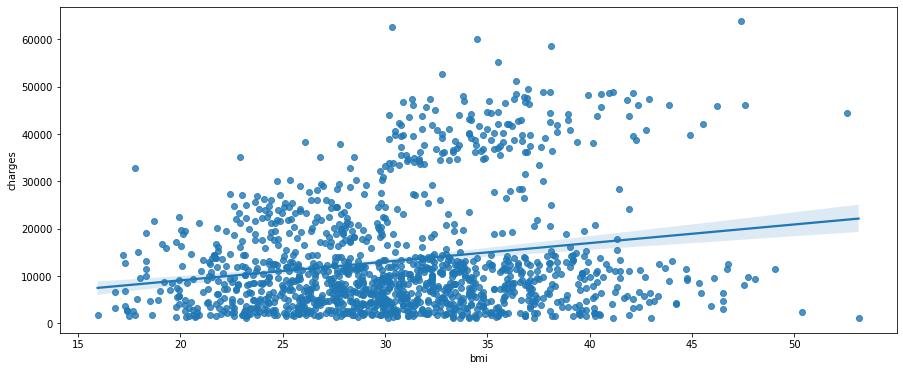

In [24]:
plt.figure(figsize=(15,6))
sns.regplot(x='bmi',y='charges',data=df)
plt.show()

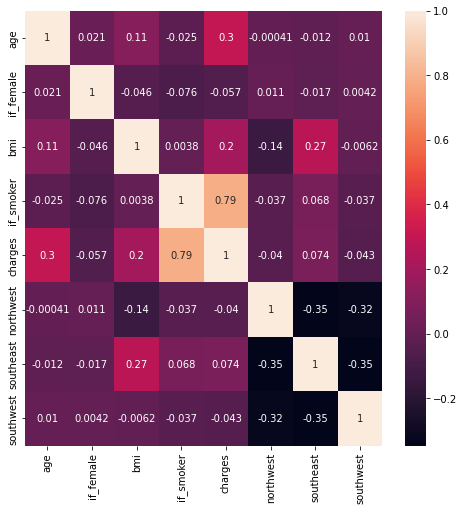

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
X = df.drop(['charges'],axis=1)
y = df['charges']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print(lm.score(X_test,y_test))

0.793108883437337


In [32]:
results = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
results

,Actual,Predicted
578,9724.53000,11240.903073
610,8547.69130,9369.966384
569,45702.02235,38011.713581
1034,12950.07120,16867.167820
198,9644.25250,7500.286394
...,...,...
574,13224.05705,14648.200711
1174,4433.91590,6681.344859
1327,9377.90470,10634.197301
817,3597.59600,6223.124209


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,-0.514853,0.985155,-0.181331,-0.503736,-0.557773,1.622978,-0.593087
1,1.548746,0.985155,-1.393130,-0.503736,-0.557773,-0.616151,-0.593087
2,-1.439915,-1.015069,-0.982242,-0.503736,-0.557773,-0.616151,1.686094
3,-1.368757,0.985155,-1.011133,1.985167,-0.557773,1.622978,-0.593087
4,-0.941805,0.985155,-1.362635,-0.503736,1.792843,-0.616151,-0.593087


# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

# Descision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=13)

# Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=13)
random_forest_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=13)

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Evaluating Multiple Linear Regression

In [39]:
#prediction with training dataset
y_pred_mlr_train = multiple_linear_reg.predict(X_train)

#prediction with testing dataset
y_pred_mlr_test = multiple_linear_reg.predict(X_test)
#training accuracy
accuracy_mlr_train = r2_score(y_train,y_pred_mlr_train)
print('Training accuracy for MLR Model:',accuracy_mlr_train)
#testing accuracy
accuracy_mlr_testing = r2_score(y_test,y_pred_mlr_test)
print('Testing accuracy for MLR Model:',accuracy_mlr_testing)
#prediction with 10-fold CV
y_pred_cv_mlr = cross_val_predict(multiple_linear_reg,X,y,cv=10)
#Accuracy after 10-fold CV
accuracy_cv_mlr = r2_score(y, y_pred_cv_mlr)
print('Accuracy for 10-fold Cross Predicted MLR Model',accuracy_cv_mlr)

Training accuracy for MLR Model: -0.49022171476415677
Testing accuracy for MLR Model: -0.3211306235643383
Accuracy for 10-fold Cross Predicted MLR Model 0.72007881362976


# Evaluating Decision Tree

In [40]:
y_pred_dtr_train = decision_tree_reg.predict(X_train)
y_pred_dtr_test = decision_tree_reg.predict(X_test)
accuracy_dtr_train = r2_score(y_train,y_pred_dtr_train)
print('Training accuracy for DTR Model:', accuracy_dtr_train)
accuracy_dtr_testing = r2_score(y_test,y_pred_dtr_test)
print('Testing accuracy for DTR Model:',accuracy_dtr_testing)
#prediction with 10-fold CV
y_pred_cv_dtr = cross_val_predict(decision_tree_reg,X,y,cv=10)
#Accuracy after 10-fold CV
accuracy_cv_dtr = r2_score(y,y_pred_cv_dtr)
print('Accuracy for 10-fold Cross Predicted DTR Model',accuracy_cv_dtr)

Training accuracy for DTR Model: 0.8665597738233303
Testing accuracy for DTR Model: 0.8646418661352426
Accuracy for 10-fold Cross Predicted DTR Model 0.8414618512168393


# Evaluating Random Forest Regression Model

In [41]:
y_pred_rfr_train = random_forest_reg.predict(X_train)
y_pred_rfr_test = random_forest_reg.predict(X_test)
accuracy_rfr_train = r2_score(y_train,y_pred_rfr_train)
print('Training accuracy for RFR Model:', accuracy_rfr_train)
accuracy_rfr_testing = r2_score(y_test,y_pred_rfr_test)
print('Testing accuracy for RFR Model:',accuracy_rfr_testing)
#prediction with 10-fold CV
y_pred_cv_rfr = cross_val_predict(random_forest_reg,X,y,cv=10)
#accuracy after 10-fold CV
accuracy_cv_rfr = r2_score(y,y_pred_cv_rfr)
print('Accuracy for 10-fold Cross Predicted RFR Model',accuracy_cv_rfr)

Training accuracy for RFR Model: 0.8749203691287142
Testing accuracy for RFR Model: 0.8927239358398791
Accuracy for 10-fold Cross Predicted RFR Model 0.8541852708064853


# Testing our best regression on new data

In [42]:
training_accuracy = [accuracy_mlr_train, accuracy_dtr_train, accuracy_rfr_train]
testing_accuracy = [accuracy_mlr_testing, accuracy_dtr_testing, accuracy_rfr_testing]
cv_accuracy = [accuracy_cv_mlr, accuracy_cv_dtr, accuracy_cv_rfr]

table_data = {"Training Accuracy": training_accuracy, "Testing Accuracy": testing_accuracy, 
               "10-Fold Score": cv_accuracy}
model_names = ["Multiple Linear Regression", "Decision Tree Regression", "Random Forest Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Training Accuracy,Testing Accuracy,10-Fold Score
Multiple Linear Regression,-0.490222,-0.321131,0.720079
Decision Tree Regression,0.866560,0.864642,0.841462
Random Forest Regression,0.874920,0.892724,0.854185


In [43]:
df.head()

,age,if_female,bmi,if_smoker,charges,northwest,southeast,southwest
0,19,1,27.900,1,16884.92400,0,0,1
1,18,0,33.770,0,1725.55230,0,1,0
2,28,0,33.000,0,4449.46200,0,1,0
3,33,0,22.705,0,21984.47061,1,0,0
4,32,0,28.880,0,3866.85520,1,0,0


# Predicting charges using sample data

In [59]:
inp_data = {'age':[62],
            'sex':['female'],
            'bmi':[32.965],
            'smoker':['no'],
            'northwest':[1],
            'southeast':[0],
            'southwest':[0]
            }
inp_data = pd.DataFrame(inp_data)
inp_data

,age,sex,bmi,smoker,northwest,southeast,southwest
0,62,female,32.965,no,1,0,0


In [60]:
inp_data['sex'] = inp_data['sex'].map(lambda x :1 if x=='female' else 0 )
inp_data['smoker'] = inp_data['smoker'].map(lambda x :1 if x=='yes' else 0)
inp_data

,age,sex,bmi,smoker,northwest,southeast,southwest
0,62,1,32.965,0,1,0,0


In [61]:
inp_data = sc.transform(inp_data)
inp_data

array([[ 1.61990478,  0.98515504,  0.36036735, -0.50373604,  1.79284291,
        -0.61615125, -0.59308686]])

In [62]:
random_forest_reg.predict(inp_data)

array([15177.58494173])